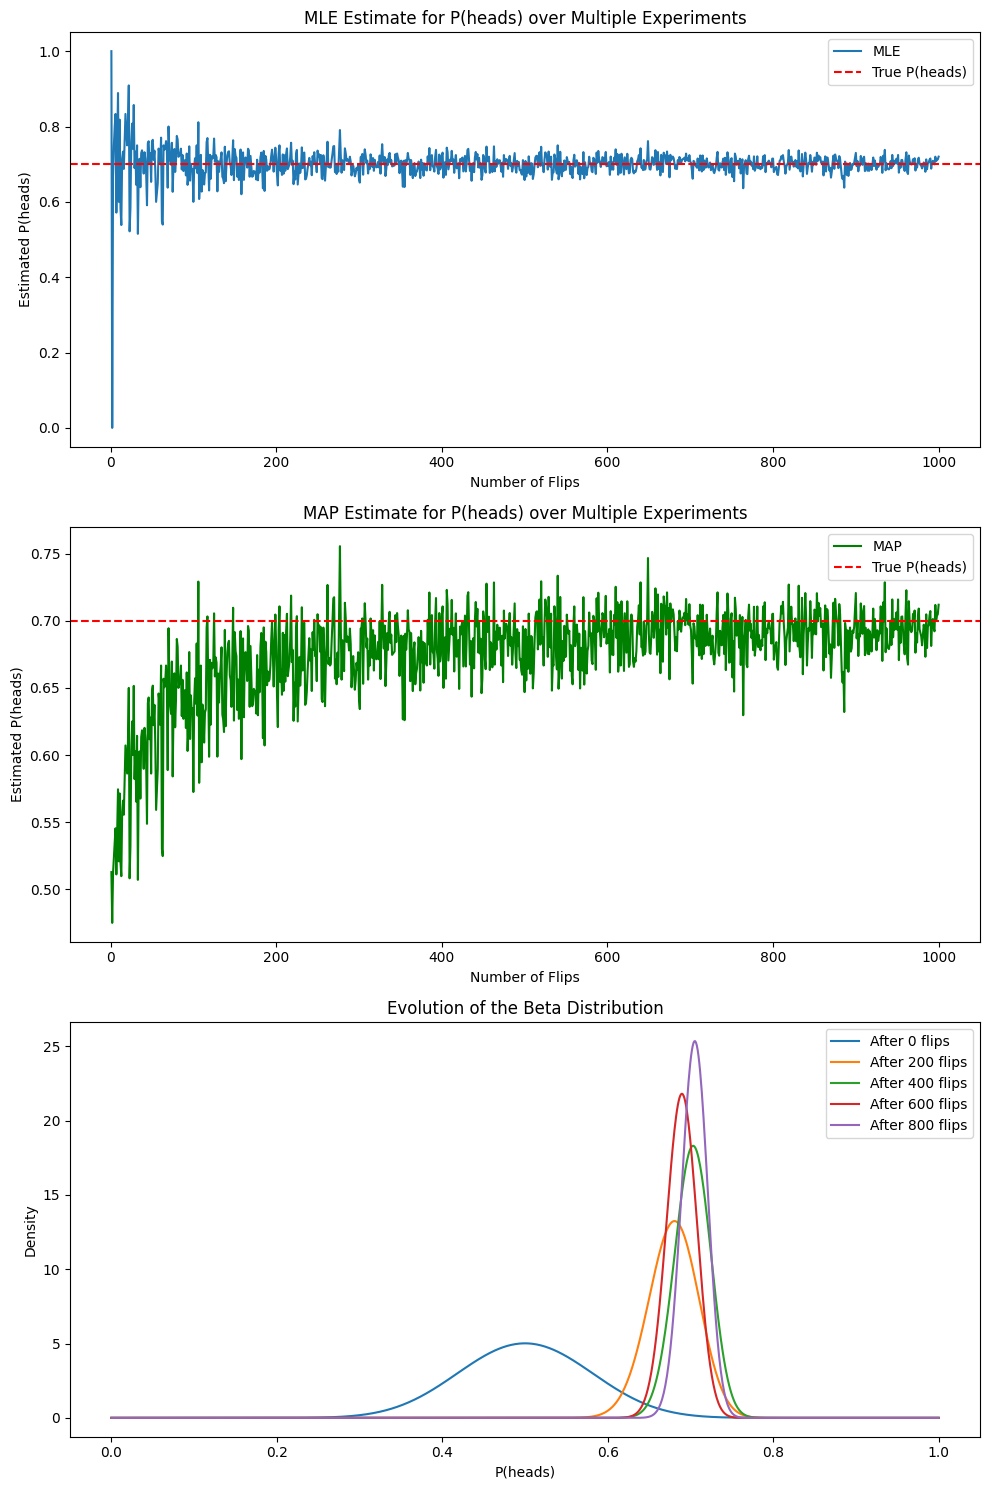

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def compute_estimates(k, n, alpha=1, beta=1):
    mle = k / n
    map_estimate = (k + alpha - 1) / (n + alpha + beta - 2)
    return mle, map_estimate

# Define parameters
trials = 1000
true_p_heads = 0.7  # True probability of getting a head
alpha_prior, beta_prior = 20, 20  # Initial values

# Initialize lists to store results
mle_values = []
map_values = []
alpha_values = [alpha_prior]
beta_values = [beta_prior]

for n in range(1, trials + 1):
    # Simulate n coin flips
    k = np.sum(np.random.rand(n) < true_p_heads)
    
    # Compute MLE and MAP
    mle, map_estimate = compute_estimates(k, n, alpha_prior, beta_prior)
    
    # Store results
    mle_values.append(mle)
    map_values.append(map_estimate)
    alpha_values.append(alpha_prior + k)
    beta_values.append(beta_prior + n - k)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# MLE Plot
ax[0].plot(range(1, trials + 1), mle_values, label='MLE')
ax[0].axhline(y=true_p_heads, color='r', linestyle='--', label='True P(heads)')
ax[0].set_title('MLE Estimate for P(heads) over Multiple Experiments')
ax[0].set_xlabel('Number of Flips')
ax[0].set_ylabel('Estimated P(heads)')
ax[0].legend()

# MAP Plot
ax[1].plot(range(1, trials + 1), map_values, label='MAP', color='g')
ax[1].axhline(y=true_p_heads, color='r', linestyle='--', label='True P(heads)')
ax[1].set_title('MAP Estimate for P(heads) over Multiple Experiments')
ax[1].set_xlabel('Number of Flips')
ax[1].set_ylabel('Estimated P(heads)')
ax[1].legend()

# Beta Distribution Evolution
x = np.linspace(0, 1, 1000)
for i in range(0, trials, int(trials/5)):  # Plotting every 1/5 of the trials for visibility
    y = beta.pdf(x, alpha_values[i], beta_values[i])
    ax[2].plot(x, y, label=f'After {i} flips')
ax[2].set_title('Evolution of the Beta Distribution')
ax[2].set_xlabel('P(heads)')
ax[2].set_ylabel('Density')
ax[2].legend()

plt.tight_layout()
plt.show()
